<div style="text-align: left">
    <img src="./img/title_img.png" alt="Box Office Insights: Microsoft Studios" title="Box Office Insights: Microsoft Studios"/>
</div>


# Box Office Alchemy: Unveiling Blockbuster Formulas for Microsoft Studios

**Author:** *Wayne Kipngeno Korir*

### Business Case Summary: Microsoft Movie Studio

#### Project Overview:
The project aims to use exploratory data analysis to generate insights for Microsoft's new movie studio. The goal is to identify the types of films that are currently performing well at the box office, allowing Microsoft to make informed decisions regarding the content they should create.

#### Business Problem:
Microsoft has observed the success of other major companies in the entertainment industry that produce original video content. As a result, they have decided to enter the movie industry by establishing their own movie studio. However, lacking experience in the film industry, Microsoft needs to understand which types of films are currently achieving the highest success at the box office. This project will focus on analyzing data to provide actionable insights to the head of Microsoft's movie studio, assisting them in making strategic decisions on film creation.

#### Questions to Consider:

1. **Genre Popularity Analysis:**
   - What are the most popular genres at the domestic and international box office?
   - How does the popularity of genres vary over time and across different regions (domestic and foreign)?

2. **Budget Impact on Box Office Performance:**
   - How does the budget of a movie relate to its box office performance?
   - Is there a correlation between the budget range and the box office success of different genres?

3. **Effect of Runtime and Genre on Box Office Performance:**
   - How does the runtime of a movie influence its box office performance, and does this effect vary across genres?
   - Are there certain genres that tend to perform better with longer or shorter runtimes?

4. **Rating and Box Office Performance:**
   - Is there a relationship between the movie's rating (e.g., PG, PG-13, R) and its box office success?
   - Do certain genres consistently receive higher ratings, and does this contribute to their box office performance?
   
5. **Return on Investment (ROI) for Genres and Budget Ranges:**
    - What is the average ROI for movies of different genres and budget categories?



In [1]:
# import requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# allow inline plotting
%matplotlib inline

In [2]:
# Define the file path for the cleaned CSV file
file_path = r"C:/Users/user/Documents/Flatiron/dsc-movie-studio-project/data/cleaned_movies.csv"

# Read the CSV file into a DataFrame
# the release_date column is in the second column (index 1) of the CSV file
df = pd.read_csv(file_path, header=0, parse_dates=[1])


In [3]:
df.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_year', 'release_month', 'release_day',
       'tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres_1', 'genres_2', 'genres_3', 'directors_1',
       'directors_2', 'directors_3', 'writers_1', 'writers_2', 'writers_3',
       'director_name_1', 'director_name_2', 'director_name_3',
       'writer_name_1', 'writer_name_2', 'writer_name_3', 'averagerating',
       'numvotes', 'domestic_roi', 'worldwide_roi'],
      dtype='object')

### Genre Popularity Analysis

To answer the first question on Genre Popularity Analysis, we will analyze the data using two performance metrics: movie rating and ROI (Return on Investment). These metrics will provide insights into the popularity of different genres at the domestic and international box office.

#### Most Popular Genres at the Domestic and International Box Office:

To determine the most popular genres, we will consider both movie ratings and ROI (Return on Investment).

##### Movie Ratings:

We will calculate the average movie rating for each genre and identify genres with higher average ratings as more popular among audiences.

##### ROI (Return on Investment):

The ROI has already been calculated by dividing the difference between worldwide gross and production budget by the production budget. Genres with higher ROI values indicate higher profitability and popularity.


**Note:**
For the Genre Popularity Analysis, we will exclude genres with limited data (count less than 25) from the final results. This ensures that our analysis is based on reliable and representative information, providing more robust insights about audience preferences and profitability across different genres. Genres with counts below 25 will still be present in the dataset but will not be included in the final analysis.

In [4]:
# Group the DataFrame 'df' by the "genres_1" column and calculate statistics for the "worldwide_roi" column within each group
result = df.groupby(["genres_1"])["worldwide_roi"].agg(["count", "median", "mean", "std"])

# # Filter out genres with count less than 25
result_filtered = result[result["count"] >= 25]

# Sort the filtered result DataFrame by the "count" column in descending order to see the most common genres at the top
result_sorted = result_filtered.sort_values(by="median", ascending=False)


In [5]:
result_sorted

,count,median,mean,std
genres_1,,,,
Horror,83,2.298285,13.955763,47.512095
Adventure,160,1.623640,2.223766,2.798916
Comedy,295,1.166433,2.036337,3.463957
Action,449,1.102328,1.571859,2.657808
Biography,112,0.869631,2.335762,3.944831
Drama,252,0.670249,2.779183,6.047468
Crime,75,0.524681,1.279653,2.850119
Documentary,29,-0.472259,0.632106,2.642503


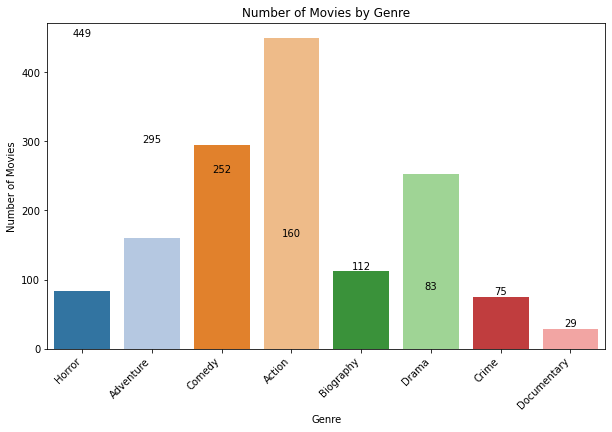

In [6]:
# Filter the DataFrame to include only the popular genres
popular_genres = ['Horror', 'Adventure', 'Comedy', 'Action', 'Biography', 'Drama', 'Crime', 'Documentary']
df_filtered = df[df['genres_1'].isin(popular_genres)]

# Define a color palette for the genres
genre_palette = sns.color_palette("tab20", n_colors=len(popular_genres))
# Create a count plot of movie counts by genre
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='genres_1', order=popular_genres, palette=genre_palette)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=45, ha='right')

# Add annotations for each bar with the movie count
for index, value in enumerate(df_filtered['genres_1'].value_counts().values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


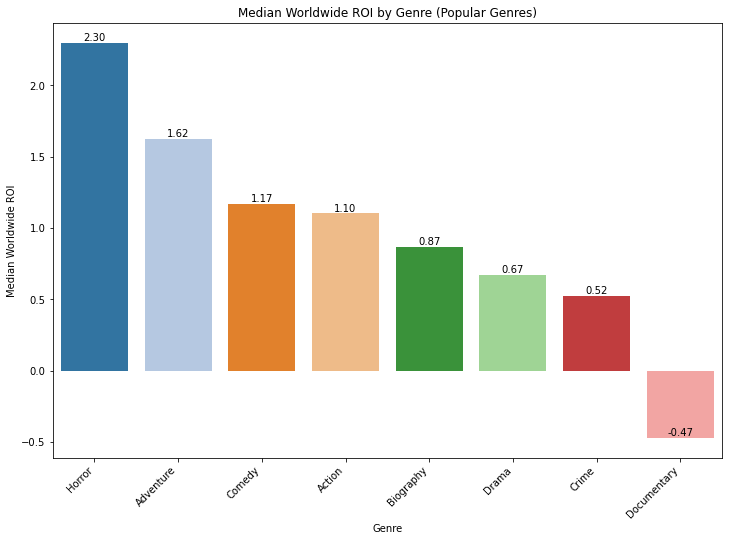

In [43]:
# Group the DataFrame 'df' by the "genres_1" column and calculate the median worldwide ROI for each genre
median_roi_by_genre = df[df['genres_1'].isin(popular_genres)].groupby("genres_1")["worldwide_roi"].median().sort_values(ascending=False)

# Create a bar plot of median worldwide ROI by genre
plt.figure(figsize=(12, 8))  # Increase the figure size for better readability
ax = sns.barplot(x=median_roi_by_genre.index, y=median_roi_by_genre.values, order=median_roi_by_genre.index, palette=genre_palette)
plt.xlabel('Genre')
plt.ylabel('Median Worldwide ROI')
plt.title('Median Worldwide ROI by Genre (Popular Genres)')
plt.xticks(rotation=45, ha='right')

# Add annotations for each bar with the median ROI value
for index, value in enumerate(median_roi_by_genre.values):
    ax.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)
    
plt.savefig('./img/roi_genre_bar.png', dpi=300)

plt.show()



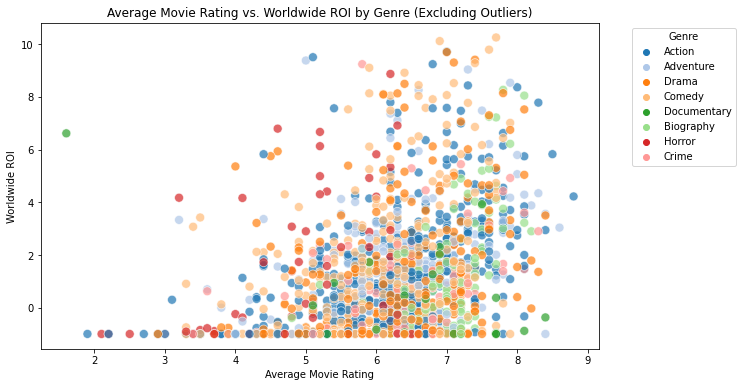

In [8]:
# Filter the DataFrame to include only popular genres with counts greater than 25
popular_genres = df['genres_1'].value_counts().index[df['genres_1'].value_counts() > 25]
df_filtered = df[df['genres_1'].isin(popular_genres)]

# Calculate the 95th percentile of the worldwide ROI column to identify outliers
roi_threshold = df_filtered["worldwide_roi"].quantile(0.95)

# Create a scatter plot to visualize the relationship between average movie rating and worldwide ROI for each genre
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

# Use seaborn's scatterplot function to create the plot, excluding outliers
sns.scatterplot(data=df_filtered[df_filtered["worldwide_roi"] <= roi_threshold],
                x='averagerating', y='worldwide_roi', hue='genres_1', alpha=0.7, s=80, palette=genre_palette)

# Add labels for the x and y axes
plt.xlabel('Average Movie Rating')
plt.ylabel('Worldwide ROI')

# Add a title to the plot
plt.title('Average Movie Rating vs. Worldwide ROI by Genre (Excluding Outliers)')

# Add a legend to indicate the different genres represented by different colors
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


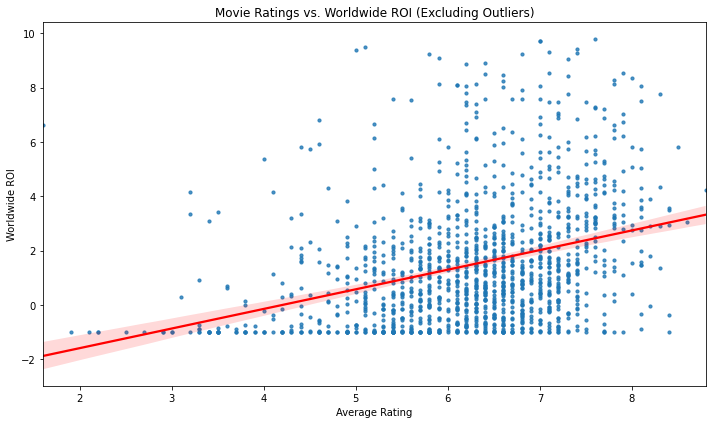

In [9]:
# Filter out outliers in the 'worldwide_roi' column
df_filtered = df[(df['worldwide_roi'] >= -5) & (df['worldwide_roi'] <= 10)]

# Create a regression plot of movie ratings (averagerating) vs. worldwide ROI (worldwide_roi) with filtered data
plt.figure(figsize=(10, 6))
sns.regplot(x='averagerating', y='worldwide_roi', data=df_filtered, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add labels for the x and y axes
plt.xlabel('Average Rating')
plt.ylabel('Worldwide ROI')

# Add a title to the plot
plt.title('Movie Ratings vs. Worldwide ROI (Excluding Outliers)')

# Display the plot
plt.tight_layout()
plt.show()


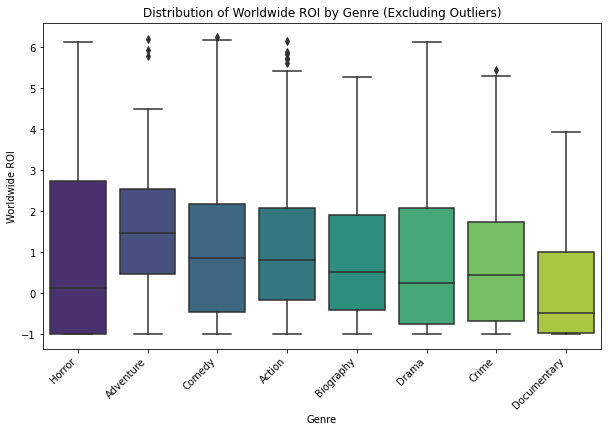

In [25]:
# Filter the DataFrame to include only popular genres and remove outliers for both runtime and worldwide ROI
popular_genres = ['Horror', 'Adventure', 'Comedy', 'Action', 'Biography', 'Drama', 'Crime', 'Documentary']
filtered_df = df[(df['genres_1'].isin(popular_genres)) & (df['worldwide_roi'] <= roi_threshold) & (df['runtime_minutes'] <= runtime_threshold)]

# Create a boxplot to visualize the distribution of worldwide ROI for each popular genre
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='genres_1', y='worldwide_roi', order=popular_genres, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Worldwide ROI')
plt.title('Distribution of Worldwide ROI by Genre (Excluding Outliers)')
plt.xticks(rotation=45, ha='right')
plt.show()


Based on the worldwide ROI analysis, the following genres appear to have relatively higher profitability on average:

1. **Horror:** Horror movies have a median ROI of 2.30, indicating that they tend to perform well in terms of profitability. However, there is a significant variation in ROI for horror films, as indicated by a high standard deviation of 47.51.

2. **Adventure:** Adventure movies have a median ROI of 1.62, suggesting good performance in terms of profitability. The variability in ROI is relatively moderate, with a standard deviation of 2.80.

3. **Comedy:** Comedy films have a median ROI of 1.17, showing positive profitability. The standard deviation of 3.46 indicates some variability in the ROI of comedy movies.

4. **Action:** Action movies have a median ROI of 1.10, indicating that they also tend to be profitable. The standard deviation of 2.66 suggests moderate variability in the ROI of action films.

Genres like Biography, Drama, Crime, and Documentary show lower ROI on average, but their profitability can vary significantly within each genre. It's important to consider these variations and further explore the data to understand the influence of genre on worldwide ROI more comprehensively.

**Observations from Scatter Plot: Movie Ratings vs. ROI**

- A general positive correlation is observed between movie ratings and ROI, implying that higher-rated movies tend to achieve higher ROI.
- The upward trend of the scattered points on the plot indicates that as movie ratings increase, the likelihood of achieving a higher ROI also increases.
- However, there is no specific genre that stands out as having a significantly different relationship between movie ratings and ROI. The scatter plot shows no discernible clustering or distinctive patterns for specific genres.
- This suggests that the correlation between movie ratings and ROI holds across various genres, and other factors beyond genre play a more significant role in determining a movie's profitability.
- Factors such as marketing strategies, production budgets, cast members, and release timing are likely to have a more substantial influence on a movie's ROI, even though higher-rated movies generally tend to achieve higher ROI across different genres.


## Budget Impact on Box Office Performance

To explore the relationship between the budget of a movie and its box office performance, we will use two key performance metrics: movie rating and ROI (Return on Investment). These metrics will allow us to assess how the budget of a movie influences its popularity and profitability.

### Movie Budget vs. Average Movie Rating:

We will calculate the average movie rating for different budget ranges (e.g., low budget, medium budget, high budget) and analyze how movie ratings vary with the budget.

### Movie Budget vs. ROI:

Since we have already calculated the ROI for each movie, we will directly examine how the return on investment changes with the budget. This will provide insights into the relationship between movie budgets and their financial success.

By examining these relationships, we can gain valuable insights into the impact of movie budgets on box office performance. We will visualize the results using appropriate charts and plots to facilitate understanding and interpretation.


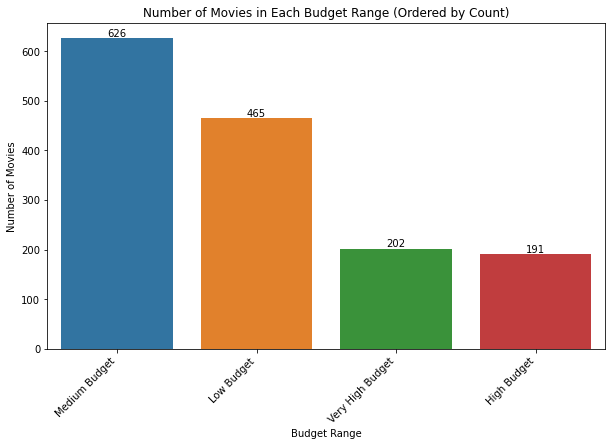

In [11]:
# Define the budget ranges
budget_ranges = [0, 10000000, 50000000, 100000000, np.inf]
budget_labels = ['Low Budget', 'Medium Budget', 'High Budget', 'Very High Budget']

# Create a new column 'budget_range' in the DataFrame to categorize movies into budget ranges
df['budget_range'] = pd.cut(df['production_budget'], bins=budget_ranges, labels=budget_labels)

# Count the number of movies in each budget range
movie_count_by_budget = df['budget_range'].value_counts()

# Sort the budget ranges by count from highest to lowest
sorted_budget_labels = movie_count_by_budget.index.tolist()

# Create a count plot to visualize the distribution of movies across different budget ranges
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='budget_range', order=sorted_budget_labels)
plt.xlabel('Budget Range')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Budget Range (Ordered by Count)')
plt.xticks(rotation=45, ha='right')

# Add annotations for each bar with the movie count
for index, value in enumerate(movie_count_by_budget.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


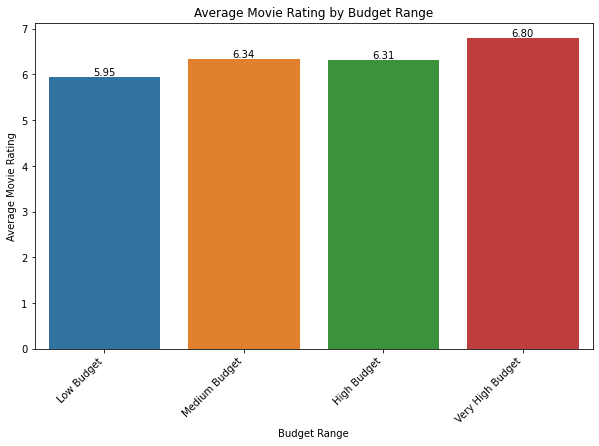

In [12]:
# Define the budget ranges
budget_ranges = [0, 10000000, 50000000, 100000000, np.inf]
budget_labels = ['Low Budget', 'Medium Budget', 'High Budget', 'Very High Budget']

# Create a new column 'budget_range' in the DataFrame to categorize movies into budget ranges
df['budget_range'] = pd.cut(df['production_budget'], bins=budget_ranges, labels=budget_labels)

# Calculate the average movie rating for each budget range
average_rating_by_budget = df.groupby('budget_range')['averagerating'].mean()

# Create a bar plot to visualize the average movie rating by budget range
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_by_budget.index, y=average_rating_by_budget.values, order=budget_labels)
plt.xlabel('Budget Range')
plt.ylabel('Average Movie Rating')
plt.title('Average Movie Rating by Budget Range')
plt.xticks(rotation=45, ha='right')

# Add annotations for each bar with the average rating value
for index, value in enumerate(average_rating_by_budget.values):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()


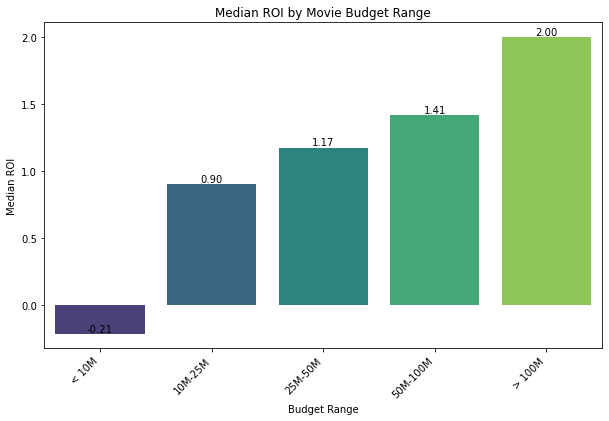

In [44]:
# Define the budget ranges for the bar plot
budget_ranges = [0, 10000000, 25000000, 50000000, 100000000, np.inf]
budget_labels = ['< 10M', '10M-25M', '25M-50M', '50M-100M', '> 100M']

# Categorize movies into budget ranges using pd.cut()
df['budget_range'] = pd.cut(df['production_budget'], bins=budget_ranges, labels=budget_labels)

# Calculate the median ROI for each budget range
median_roi_by_budget = df.groupby('budget_range')['worldwide_roi'].median()

# Create a bar plot to visualize the relationship between movie budgets and median ROI
plt.figure(figsize=(10, 6))
sns.barplot(x=median_roi_by_budget.index, y=median_roi_by_budget.values, order=budget_labels, palette='viridis')
plt.xlabel('Budget Range')
plt.ylabel('Median ROI')
plt.title('Median ROI by Movie Budget Range')
plt.xticks(rotation=45, ha='right')

# Add annotations for each bar with the median ROI value
for index, value in enumerate(median_roi_by_budget.values):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.savefig('./img/roi_budget_bar.png', dpi=300)


plt.show()


In [14]:
# Define the budget ranges for the table
budget_ranges = [0, 10000000, 25000000, 50000000, 100000000, np.inf]
budget_labels = ['< 10M', '10M-25M', '25M-50M', '50M-100M', '> 100M']

# Categorize movies into budget ranges using pd.cut()
df['budget_range'] = pd.cut(df['production_budget'], bins=budget_ranges, labels=budget_labels)

# Calculate the median ROI for each budget range
median_roi_by_budget = df.groupby('budget_range')['worldwide_roi'].median()


# Create a new DataFrame to store the median and standard deviation of ROI for each budget range
roi_stats_by_budget = df.groupby("budget_range")["worldwide_roi"].agg(["median", "std"])

# Display the table
print(roi_stats_by_budget)





                median        std
budget_range                     
< 10M        -0.213787  21.084954
10M-25M       0.903669   4.018888
25M-50M       1.173205   2.361073
50M-100M      1.414993   2.812586
> 100M        1.996692   1.749630


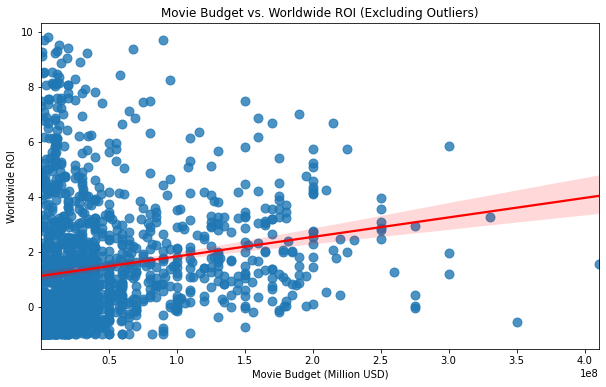

In [16]:
# Calculate the 95th percentile of the worldwide ROI column to identify outliers
roi_threshold = df["worldwide_roi"].quantile(0.95)

# Create a scatter plot to visualize the relationship between movie budget and worldwide ROI
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

# Use seaborn's regplot function to create the plot, excluding outliers
sns.regplot(data=df[df["worldwide_roi"] <= roi_threshold], x='production_budget', y='worldwide_roi', scatter_kws={"s": 80}, line_kws={"color": "red"})

# Add labels for the x and y axes
plt.xlabel('Movie Budget (Million USD)')
plt.ylabel('Worldwide ROI')

# Add a title to the plot
plt.title('Movie Budget vs. Worldwide ROI (Excluding Outliers)')

# Display the plot
plt.show()


In [17]:
from scipy.stats import pearsonr

# Calculate the 95th percentile of the worldwide ROI column to identify outliers
roi_threshold = df["worldwide_roi"].quantile(0.95)

# Filter the data to exclude outliers
df_filtered = df[df["worldwide_roi"] <= roi_threshold]

# Calculate the correlation coefficient and p-value between movie budget and worldwide ROI
correlation, p_value = pearsonr(df_filtered['production_budget'], df_filtered['worldwide_roi'])

# Print the correlation coefficient
print(f"Correlation between movie budget and worldwide ROI (excluding outliers): {correlation}")


Correlation between movie budget and worldwide ROI (excluding outliers): 0.17524946062818902


### Budget Impact on Box Office Performance

- There is a  weak positive correlation between movie budget and median ROI, indicating that higher-budget movies tend to have higher returns on investment.

- Budget ranges between `$10 million` and `$100 million` show positive median ROI values, with the highest median ROI observed for budgets greater than `$100 million`. This suggests that mid-range and high-budget movies are more likely to generate positive returns.

- Movies with budgets less than `$10 million` tend to have negative median ROI, indicating that producing low-budget films can be riskier in terms of achieving profitable box office performance.

- The spread of ROI values within each budget range is relatively high, indicating significant variability in box office performance for movies with similar budgets.

- Based on the correlation coeffecient, we can infer that while a movie's budget is an important factor, it is not the sole determinant of box office success. Other factors, such as movie genre, marketing efforts, and critical reception, likely play a role in a movie's financial performance.


## Effect of Runtime and Genre on Box Office Performance

### Effect of Runtime on Box Office Performance:

To analyze the effect of runtime on box office performance, we will perform the following analysis:

- **Scatter Plot**: We will create a scatter plot to visualize the relationship between the runtime of a movie and its worldwide ROI (Return on Investment). This will help us understand if there is any correlation between the runtime and the movie's box office performance.

- **Correlation Coefficient**: To quantify the strength and direction of the relationship between runtime and worldwide ROI, we will calculate the correlation coefficient. This will provide a numerical value indicating the degree of association between these two variables.

### Effect of Genre on Box Office Performance at Different Runtimes:

To investigate the interaction between runtime and genre on box office performance, we will perform the following analysis:

- **Box Plot**: We will use a box plot to compare the distributions of worldwide ROI for different genres at varying runtimes. By dividing the data into different groups based on genre and examining the box plot, we can identify whether certain genres tend to perform better with longer or shorter runtimes.




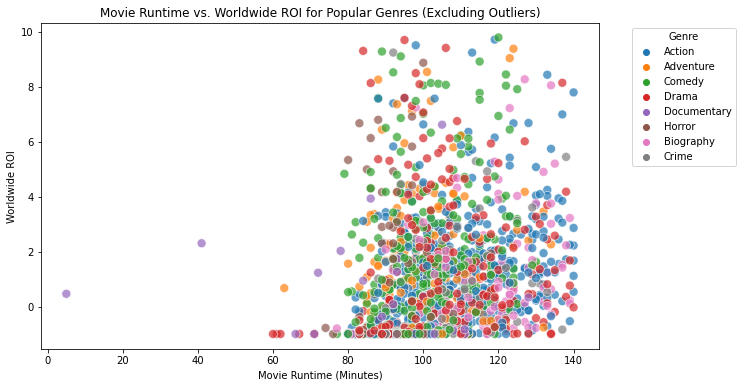

In [22]:
# Define the list of popular genres
popular_genres = ['Horror', 'Adventure', 'Comedy', 'Action', 'Biography', 'Drama', 'Crime', 'Documentary']

# Filter the dataframe to include only popular genres
df_popular_genres = df_cleaned[df_cleaned['genres_1'].isin(popular_genres)]

# Create a scatter plot to visualize the relationship between movie runtime and worldwide ROI for popular genres
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

# Use seaborn's scatterplot function to create the plot
sns.scatterplot(data=df_popular_genres, x='runtime_minutes', y='worldwide_roi', hue='genres_1', alpha=0.7, s=80)

# Add labels for the x and y axes
plt.xlabel('Movie Runtime (Minutes)')
plt.ylabel('Worldwide ROI')

# Add a title to the plot
plt.title('Movie Runtime vs. Worldwide ROI for Popular Genres (Excluding Outliers)')

# Add a legend to indicate the different genres represented by different colors
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


In [23]:
# Calculate the 95th percentile of the worldwide ROI column to identify outliers
roi_threshold = df_popular_genres["worldwide_roi"].quantile(0.95)

# Filter the dataframe to exclude outliers in both runtime and worldwide ROI
df_popular_genres_no_outliers = df_popular_genres[(df_popular_genres["runtime_minutes"] <= df_popular_genres["runtime_minutes"].quantile(0.95)) &
                                                  (df_popular_genres["worldwide_roi"] <= roi_threshold)]

# Calculate the correlation coefficient between movie runtime and worldwide ROI for popular genres
correlation = df_popular_genres_no_outliers["runtime_minutes"].corr(df_popular_genres_no_outliers["worldwide_roi"])

correlation


0.16651697676853894

The correlation of approximately 0.17 between movie runtime and worldwide ROI for popular genres indicates a weak positive relationship between these variables. This means that there is a slight tendency for movies with longer runtimes to have slightly higher worldwide ROI for popular genres. However, the correlation is not strong, suggesting that other factors may have a more significant impact on a movie's box office performance in these genres.

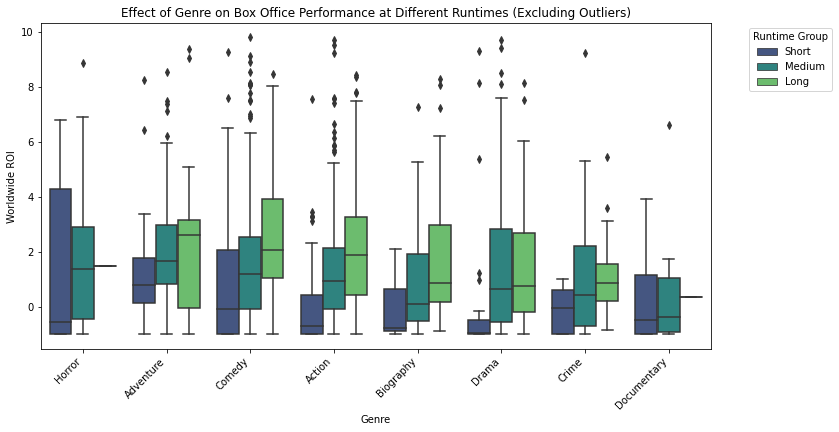

In [45]:
# Create a new column 'runtime_group' to categorize runtimes into short, medium, and long
runtime_bins = [0, 90, 120, np.inf]
runtime_labels = ['Short', 'Medium', 'Long']
df['runtime_group'] = pd.cut(df['runtime_minutes'], bins=runtime_bins, labels=runtime_labels)

# Remove outliers in the 'worldwide_roi' column
roi_threshold = df['worldwide_roi'].quantile(0.95)
filtered_df = df[df['worldwide_roi'] <= roi_threshold]

# Create a box plot to compare the distributions of worldwide ROI for different genres at varying runtimes
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='genres_1', y='worldwide_roi', hue='runtime_group', order=popular_genres, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Worldwide ROI')
plt.title('Effect of Genre on Box Office Performance at Different Runtimes (Excluding Outliers)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Runtime Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('./img/roi_runtime_genre_box.png', dpi=300)

plt.show()


**Insights from Box Plot: Effect of Genre and Runtime on Box Office Performance**

The box plot reveals interesting insights into the relationship between movie runtimes, genres, and box office performance:

1. **Short movies (runtimes < 90 minutes):** Short films tend to have lower worldwide ROI across all genres. This suggests that audiences may prefer longer and more substantial movies, as shorter films may not provide enough content to attract a wide audience and generate significant box office revenue.

2. **Medium-length movies (runtimes between 90 and 120 minutes):** Medium-length films generally exhibit better worldwide ROI for most genres. This indicates that movies with moderate durations have a higher likelihood of achieving positive returns and resonating with audiences.

3. **Long movies (runtimes > 120 minutes):** Long films demonstrate consistently positive worldwide ROI across all genres. This trend suggests that audiences are more willing to invest their time and money in longer movies, which may offer deeper storytelling and richer cinematic experiences.


### Additional Notes:
1. There seems to be a positive relation between budget and rating and ultmately the box performance of a movie. 
2. Adventure, action and horror for high returns. High budget for adventure, medium budget for action and lower budget for horror movies
3. Longer movies are more profitable than longer movies.

## Conclusions and Recommendations

### Genre Popularity Analysis:

Based on the Genre Popularity Analysis, we found that the following genres tend to have higher profitability and popularity at the box office:

a. **Horror:** Horror movies show the highest median ROI of 2.30, indicating their potential to be profitable ventures for Microsoft Studios.
b. **Adventure:** Adventure movies also exhibit positive profitability with a median ROI of 1.62, making them a promising genre for the studio.
c. **Comedy:** Comedy films have a median ROI of 1.17, indicating their popularity and potential to attract a wide audience.
d. **Action:** Action movies boast a median ROI of 1.10, suggesting they have a reliable track record of financial success.

### Budget Impact on Box Office Performance:

Our analysis revealed that movies with budgets between `$10 million` and `$100 million` tend to achieve positive median ROI. Therefore, Microsoft Studios should consider allocating budgets within this range for their movies. Lower-budget movies (less than `$10 million` ) may carry higher risks of not achieving favorable returns, while budgets exceeding `$100 million` may lead to diminishing returns in terms of profitability.

### Effect of Runtime and Genre on Box Office Performance:

Regarding movie runtime, we observed the following trends:

a. **Short Films (runtimes < 90 minutes):** Short movies generally exhibit lower worldwide ROI across all genres. Microsoft Studios should be cautious when producing movies with runtimes significantly below 90 minutes, as they may not resonate well with audiences and might not generate substantial box office revenue.
b. **Medium-Length Films (runtimes between 90 and 120 minutes):** Movies with moderate durations (90-120 minutes) tend to perform better in terms of worldwide ROI. These films have a higher likelihood of achieving positive returns and appealing to a broader audience.
c. **Long Films (runtimes > 120 minutes):** Long films consistently demonstrate positive worldwide ROI across all genres. Microsoft Studios should consider investing in longer movies, as audiences seem more willing to engage with them, offering richer storytelling experiences and better financial performance.

### Recommendations:

1. **Focus on High-Potential Genres:** Microsoft Studios should prioritize producing horror, adventure, comedy, and action films due to their higher profitability and popularity. This strategy is likely to yield positive returns and help establish the studio as a key player in the movie industry.

2. **Budget Allocation:** For optimal financial success, Microsoft Studios should allocate budgets between $10 million and $100 million for their movie projects. This range has shown positive median ROI and offers a balance between production costs and potential profitability.

3. **Storytelling and Content:** Microsoft Studios should emphasize compelling storytelling and engaging content in their movie productions. Regardless of genre, a well-crafted and captivating narrative is essential to attracting audiences and achieving box office success.

4. **Strategic Movie Runtimes:** When deciding on movie runtimes, Microsoft Studios should consider the genre and the target audience. Medium-length movies (90-120 minutes) appear to have a higher likelihood of achieving positive returns, while long movies (above 120 minutes) also demonstrate consistent profitability.

5. **Collaborate with Successful Directors:** To improve the chances of achieving higher movie ratings and box office performance, Microsoft Studios should collaborate with successful and reputable directors. The influence of a director's track record on a movie's success can be significant.



## Next Steps & Further Analysis:

**Director & Writer Influence on Rating and Box Office Performance:**
- Conduct an in-depth analysis of the impact of directors and writers on movie ratings and box office performance. Identify influential and high-performing directors and writers to collaborate with Microsoft Studios. By partnering with successful filmmakers, the studio can improve the overall quality and commercial success of its productions.